[Conditional generation](#conditional_generation)\
[CDE samples](#cde_samples)\
[CDiffE samples](#cdiffe_samples)\
[SMCDiff samples](#smcdiff_samples)\
[Comparison](#comparison)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import functools
from sklearn import datasets
import matplotlib.pyplot as plt
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm import notebook
import seaborn as sns
from ema_pytorch import EMA
import math
from torch.distributions import Normal 

#import models
from models import ScoreNet_2D, cde_ScoreNet_2D

#import training fns
from training import loss_fn, train_model, CDE_loss_fn_2D

#import SDE functions
from SDE import marginal_prob_std_fn_2D as marginal_prob_std_fn
from SDE import diffusion_coeff_fn_2D as diffusion_coeff_fn

#import sampling functions
from sampling import Euler_Maruyama_sampler_2D as Euler_Maruyama_sampler
from sampling import pc_sampler_2D as pc_sampler
from sampling import ode_sampler_2D as ode_sampler
from sampling import CDE_Euler_Maruyama_sampler_2D as CDE_Euler_Maruyama_sampler
from sampling import CDE_pc_sampler_2D as CDE_pc_sampler
from sampling import CDiffE_Euler_Maruyama_sampler_2D as CDiffE_Euler_Maruyama_sampler
from sampling import CDiffE_pc_sampler_2D as CDiffE_pc_sampler
from sampling import SMCDiff_Euler_Maruyama_sampler_2D as SMCDiff_Euler_Maruyama_sampler
from sampling import SMCDiff_pc_sampler_2D as SMCDiff_pc_sampler
from sampling import SMCDiff_Euler_Maruyama_sampler_2D as SMCDiff_Euler_Maruyama_sampler
from sampling import get_diffused_2D, sde_VE

In [ ]:
import importlib
#importlib.reload(sampling) 
#importlib.reload(models)

# Unconditional generation

## Generate training datasets

In [3]:
ex_1 = torch.load('data/ex_1.pt')
ex_2 = torch.load('data/ex_2.pt')
ex_3 = torch.load('data/ex_3.pt')

In [4]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [5]:
sum(p.numel() for p in score_model.parameters())

32210

## Train unconditional models

In [6]:
losses_1 = train_model(score_model, ex_1, loss_fn, marginal_prob_std_fn, 'ex_1_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


KeyboardInterrupt: 

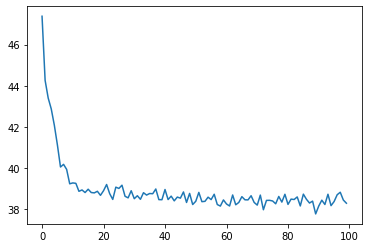

In [7]:
plt.plot(losses_1)

In [15]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [16]:
losses_2 = train_model(score_model, ex_2, loss_fn, marginal_prob_std_fn, 'ex_2_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

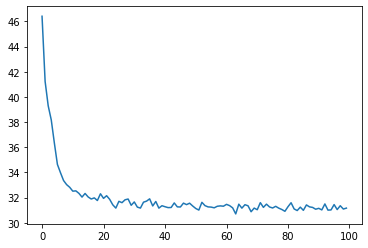

In [17]:
plt.plot(losses_2)

In [42]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [43]:
losses_3 = train_model(score_model, ex_3, loss_fn, marginal_prob_std_fn, 'ex_3_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

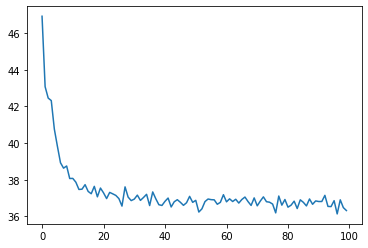

In [44]:
plt.plot(losses_3)

## Draw unconditional samples

### Example 1

In [6]:
ckpt = torch.load('models/ex_1.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [7]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 266


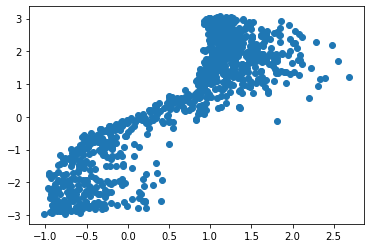

In [10]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

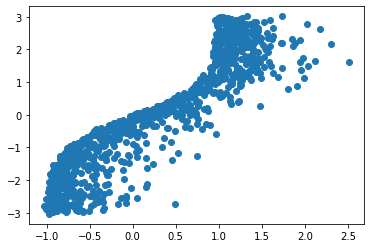

In [11]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

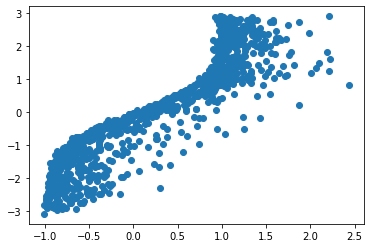

In [12]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

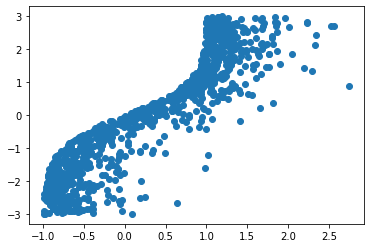

In [25]:
idx = np.random.choice(50000, 1000)
ex_1_samples = ex_1[idx]
plt.scatter(ex_1_samples[:,0], ex_1_samples[:,1])

### Example 2

In [26]:
ckpt = torch.load('models/ex_2.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [27]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [28]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [29]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 278


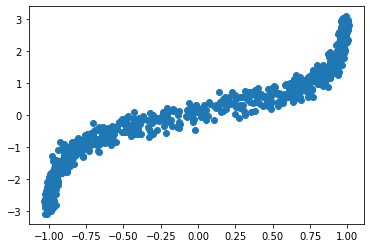

In [30]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

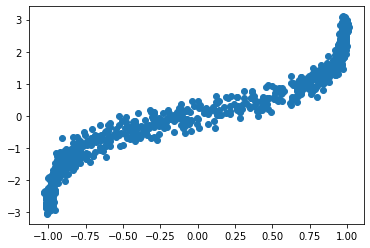

In [31]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

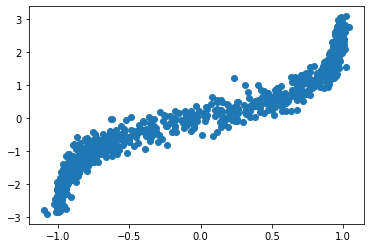

In [32]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

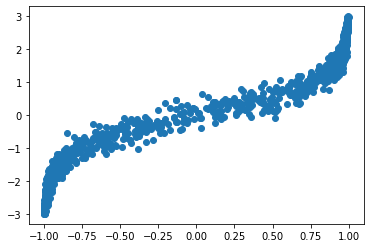

In [33]:
idx = np.random.choice(50000, 1000)
ex_2_samples = ex_2[idx]
plt.scatter(ex_2_samples[:,0], ex_2_samples[:,1])

### Example 3

In [53]:
ckpt = torch.load('models/ex_3.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [54]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [55]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [56]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 272


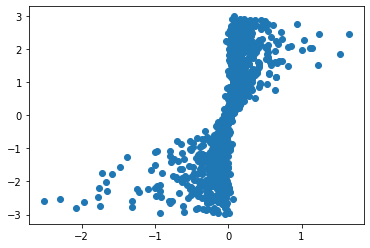

In [57]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

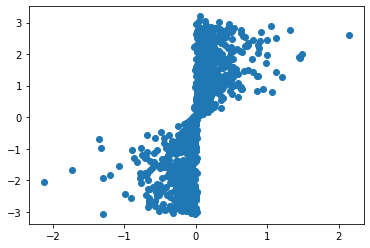

In [58]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

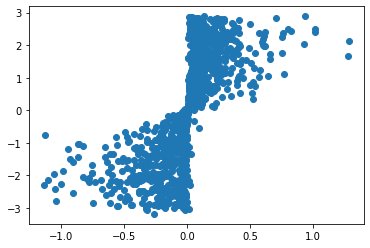

In [59]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

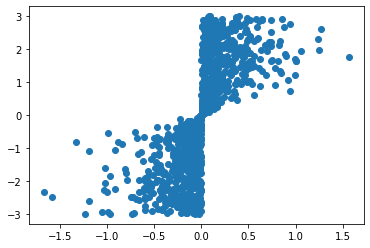

In [61]:
idx = np.random.choice(50000, 1000)
ex_3_samples = ex_3[idx]
plt.scatter(ex_3_samples[:,0], ex_3_samples[:,1])

<hr style="border:4px solid black">

<a id='conditional_generation'></a>
# Conditional generation

## Generate testing datasets

In [9]:
actual_samples_pos = np.random.gamma(1,0.3, size = 100000) + np.tanh(1.2)
actual_samples_0 = np.random.gamma(1,0.3, size = 100000) + np.tanh(0)
actual_samples_neg = np.random.gamma(1,0.3, size = 100000) + np.tanh(-1.2)

In [10]:
actual_samples_pos_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) + 1.2)
actual_samples_0_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) + 0)
actual_samples_neg_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) - 1.2)

In [11]:
actual_samples_pos_3 = np.random.gamma(1,0.3, size=100000) * np.tanh(1.2)
actual_samples_neg_3 = np.random.gamma(1,0.3, size=100000) * np.tanh(-1.2)

## Train conditional model

Have a bunch of training points (x,y). Then only forward diffuse the x components, so we get to (x_N, y). Then train NN to approximate the score with inputs (x_t, y, t), and the same loss as the unconditional method.

In [7]:
score_model = cde_ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [8]:
losses_1 = train_model(score_model, ex_1, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_1_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

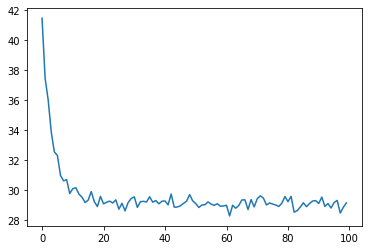

In [49]:
plt.plot(losses_1)

In [53]:
score_model = cde_ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [54]:
losses_2 = train_model(score_model, ex_2, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_2_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


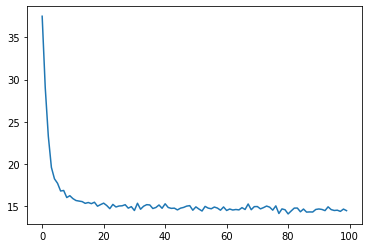

In [55]:
plt.plot(losses_2)

In [56]:
score_model = cde_ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [57]:
losses_3 = train_model(score_model, ex_3, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_3_test.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

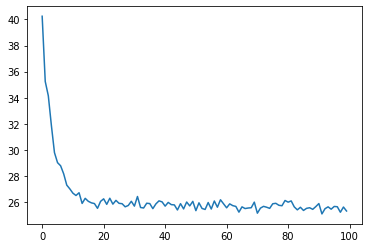

In [58]:
plt.plot(losses_3)

<a id='cde_samples'></a>
## Draw CDE samples

### Example 1

In [19]:
score_model = cde_ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('models/cde_1.pth')
score_model.load_state_dict(ckpt)
cde_samples_0 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)
cde_samples_pos = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

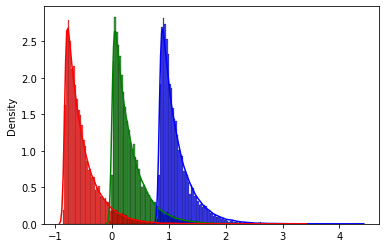

In [13]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(cde_samples_0[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(cde_samples_pos[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(cde_samples_neg[:,0], stat = 'density', color = 'red')

### Example 2

In [14]:
ckpt = torch.load('models/cde_2.pth')
score_model.load_state_dict(ckpt)
cde_samples_0_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)
cde_samples_pos_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

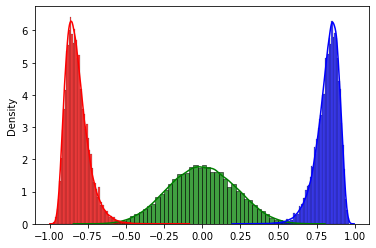

In [17]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(cde_samples_0_2[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(cde_samples_pos_2[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(cde_samples_neg_2[:,0], stat = 'density', color = 'red')

### Example 3

In [15]:
ckpt = torch.load('models/cde_3.pth')
score_model.load_state_dict(ckpt)

cde_samples_pos_3 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg_3 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

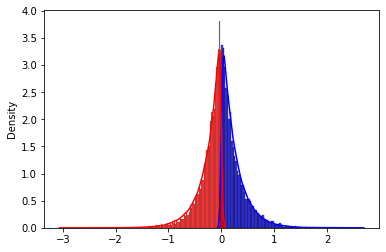

In [18]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(cde_samples_pos_3[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(cde_samples_neg_3[:,0], stat = 'density', color = 'red')

In [19]:
torch.save(cde_samples_0, 'data/cde_0_1.pt')
torch.save(cde_samples_pos, 'data/cde_pos_1.pt')
torch.save(cde_samples_neg, 'data/cde_neg_1.pt')

torch.save(cde_samples_0_2, 'data/cde_0_2.pt')
torch.save(cde_samples_pos_2, 'data/cde_pos_2.pt')
torch.save(cde_samples_neg_2, 'data/cde_neg_2.pt')

torch.save(cde_samples_pos_3, 'data/cde_pos_3.pt')
torch.save(cde_samples_neg_3, 'data/cde_neg_3.pt')

<hr style="border:2px solid black">

<a id='cdiffe_samples'></a>
## Draw CDiffE samples

### Example 1

In [14]:
diffused_0 = [get_diffused_2D(torch.tensor(0, dtype = torch.float32), 1000, sde_VE, 0.01, 8) for i in range(10)]
diffused_pos = [get_diffused_2D(torch.tensor(1.2, dtype = torch.float32), 1000, sde_VE, 0.01, 8) for i in range(10)]
diffused_neg = [get_diffused_2D(torch.tensor(-1.2, dtype = torch.float32), 1000, sde_VE, 0.01, 8) for i in range(10)]

In [17]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('models/ex_1.pth')
score_model.load_state_dict(ckpt)
cdiffe_samples_0 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000, diffused_y = diffused_0[0])

cdiffe_samples_neg = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[0])

cdiffe_samples_pos = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000,diffused_y = diffused_pos[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [66]:
cdiffe_0 = [cdiffe_samples_0]
cdiffe_pos = [cdiffe_samples_pos]
cdiffe_neg = [cdiffe_samples_neg]

In [67]:
for i in range(1,10):
    new_sample_0 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_0[i])
    new_sample_pos = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[i])
    cdiffe_0.append(new_sample_0)
    cdiffe_pos.append(new_sample_pos)
    cdiffe_neg.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

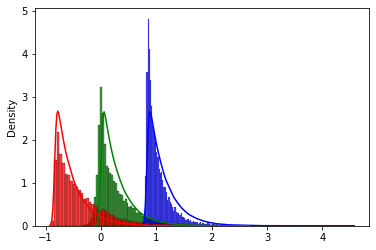

In [68]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(torch.vstack(cdiffe_0)[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(torch.vstack(cdiffe_pos)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(torch.vstack(cdiffe_neg)[:,0], stat = 'density', color = 'red')

In [105]:
cdiffe_samples_0 = torch.vstack(cdiffe_0)[:,[0]]
cdiffe_samples_pos = torch.vstack(cdiffe_pos)[:,[0]]
cdiffe_samples_neg = torch.vstack(cdiffe_neg)[:,[0]]

### Example 2

In [69]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('models/ex_2.pth')
score_model.load_state_dict(ckpt)
cdiffe_samples_0_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_0[0])

cdiffe_samples_neg_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[0])

cdiffe_samples_pos_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_pos[0])

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [70]:
cdiffe_0_2 = [cdiffe_samples_0_2]
cdiffe_pos_2 = [cdiffe_samples_pos_2]
cdiffe_neg_2 = [cdiffe_samples_neg_2]

In [71]:
for i in range(1,10):
    new_sample_0 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_0[i])
    new_sample_pos = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[i])
    cdiffe_0_2.append(new_sample_0)
    cdiffe_pos_2.append(new_sample_pos)
    cdiffe_neg_2.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

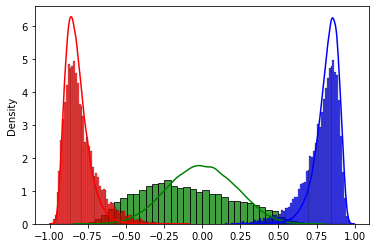

In [72]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(torch.vstack(cdiffe_0_2)[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(torch.vstack(cdiffe_pos_2)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(torch.vstack(cdiffe_neg_2)[:,0], stat = 'density', color = 'red')

In [104]:
cdiffe_samples_0_2 = torch.vstack(cdiffe_0_2)[:,[0]]
cdiffe_samples_pos_2 = torch.vstack(cdiffe_pos_2)[:,[0]]
cdiffe_samples_neg_2 = torch.vstack(cdiffe_neg_2)[:,[0]]

### Example 3

In [73]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('models/ex_3.pth')
score_model.load_state_dict(ckpt)

cdiffe_samples_neg_3 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[0])

cdiffe_samples_pos_3 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_pos[0])

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [74]:
cdiffe_pos_3 = [cdiffe_samples_pos_3]
cdiffe_neg_3 = [cdiffe_samples_neg_3]

In [75]:
for i in range(1,10):
    new_sample_pos = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 1000, diffused_y = diffused_neg[i])

    cdiffe_pos_3.append(new_sample_pos)
    cdiffe_neg_3.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

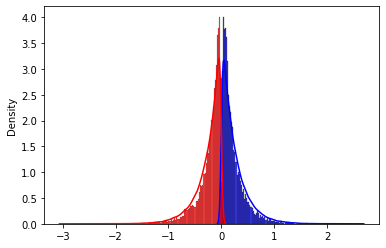

In [76]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(torch.vstack(cdiffe_pos_3)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(torch.vstack(cdiffe_neg_3)[:,0], stat = 'density', color = 'red')

In [103]:
cdiffe_samples_pos_3 = torch.vstack(cdiffe_pos_3)[:,[0]]
cdiffe_samples_neg_3 = torch.vstack(cdiffe_neg_3)[:,[0]]

In [116]:
torch.save(cdiffe_samples_0, 'data/cdiffe_0_1.pt')
torch.save(cdiffe_samples_pos, 'data/cdiffe_pos_1.pt')
torch.save(cdiffe_samples_neg, 'data/cdiffe_neg_1.pt')

torch.save(cdiffe_samples_0_2, 'data/cdiffe_0_2.pt')
torch.save(cdiffe_samples_pos_2, 'data/cdiffe_pos_2.pt')
torch.save(cdiffe_samples_neg_2, 'data/cdiffe_neg_2.pt')

torch.save(cdiffe_samples_pos_3, 'data/cdiffe_pos_3.pt')
torch.save(cdiffe_samples_neg_3, 'data/cdiffe_neg_3.pt')

<hr style="border:2px solid black">

<a id='smcdiff_samples'></a>
## Draw SMCDiff samples

## Example 1

In [18]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('models/ex_1.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_0 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 10000, diffused_y = diffused_0[0])

smcdiff_samples_pos = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[0])

smcdiff_samples_neg = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

605 resampling, departure=5083.17
505 resampling, departure=5005.45
474 resampling, departure=5608.09
453 resampling, departure=5057.58
316 resampling, departure=5079.75


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

618 resampling, departure=513.55
584 resampling, departure=573.86
534 resampling, departure=517.94
457 resampling, departure=502.76


In [78]:
smcdiff_0 = [smcdiff_samples_0]
smcdiff_pos = [smcdiff_samples_pos]
smcdiff_neg = [smcdiff_samples_neg]

In [79]:
for i in range(1,10):
    new_sample_0 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 1000, diffused_y = diffused_0[i])
    new_sample_pos = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[i])
    smcdiff_0.append(new_sample_0)
    smcdiff_pos.append(new_sample_pos)
    smcdiff_neg.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

615 resampling, departure=500.81
568 resampling, departure=560.87
442 resampling, departure=533.83


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

476 resampling, departure=503.58


  0%|          | 0/1000 [00:00<?, ?it/s]

574 resampling, departure=500.71
466 resampling, departure=501.74
439 resampling, departure=564.44


  0%|          | 0/1000 [00:00<?, ?it/s]

715 resampling, departure=536.83
660 resampling, departure=505.32
634 resampling, departure=548.13


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

565 resampling, departure=525.89
508 resampling, departure=500.87


  0%|          | 0/1000 [00:00<?, ?it/s]

480 resampling, departure=510.42


  0%|          | 0/1000 [00:00<?, ?it/s]

599 resampling, departure=520.80


  0%|          | 0/1000 [00:00<?, ?it/s]

602 resampling, departure=549.48
418 resampling, departure=511.76
357 resampling, departure=518.59
184 resampling, departure=507.27


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

674 resampling, departure=519.54
589 resampling, departure=550.16
321 resampling, departure=501.88
236 resampling, departure=500.65


  0%|          | 0/1000 [00:00<?, ?it/s]

517 resampling, departure=509.96


  0%|          | 0/1000 [00:00<?, ?it/s]

618 resampling, departure=518.75
406 resampling, departure=504.15


  0%|          | 0/1000 [00:00<?, ?it/s]

522 resampling, departure=535.59
508 resampling, departure=536.54
425 resampling, departure=500.50


  0%|          | 0/1000 [00:00<?, ?it/s]

622 resampling, departure=557.82
548 resampling, departure=548.35
471 resampling, departure=500.24


  0%|          | 0/1000 [00:00<?, ?it/s]

445 resampling, departure=510.45
140 resampling, departure=505.12


  0%|          | 0/1000 [00:00<?, ?it/s]

588 resampling, departure=501.61
433 resampling, departure=555.46


  0%|          | 0/1000 [00:00<?, ?it/s]

384 resampling, departure=501.54


  0%|          | 0/1000 [00:00<?, ?it/s]

317 resampling, departure=504.21


  0%|          | 0/1000 [00:00<?, ?it/s]

457 resampling, departure=521.64
421 resampling, departure=507.09
345 resampling, departure=538.56


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

655 resampling, departure=514.02


  0%|          | 0/1000 [00:00<?, ?it/s]

678 resampling, departure=511.30
585 resampling, departure=518.08
464 resampling, departure=512.14
283 resampling, departure=528.52


  0%|          | 0/1000 [00:00<?, ?it/s]

639 resampling, departure=504.68


  0%|          | 0/1000 [00:00<?, ?it/s]

283 resampling, departure=511.43


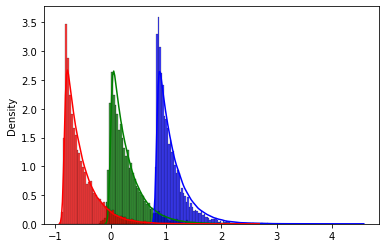

In [80]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(torch.vstack(smcdiff_0)[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(torch.vstack(smcdiff_pos)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(torch.vstack(smcdiff_neg)[:,0], stat = 'density', color = 'red')

In [102]:
smcdiff_samples_0 = torch.vstack(smcdiff_0)[:,[0]]
smcdiff_samples_pos = torch.vstack(smcdiff_pos)[:,[0]]
smcdiff_samples_neg = torch.vstack(smcdiff_neg)[:,[0]]

## Example 2

In [81]:
ckpt = torch.load('models/ex_2.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_0_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 1000, diffused_y = diffused_0[0])

smcdiff_samples_pos_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[0])

smcdiff_samples_neg_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[0])

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

684 resampling, departure=501.98
491 resampling, departure=516.90
361 resampling, departure=531.72


  0%|          | 0/1000 [00:00<?, ?it/s]

622 resampling, departure=521.25
400 resampling, departure=505.01


  0%|          | 0/1000 [00:00<?, ?it/s]

650 resampling, departure=522.93


In [82]:
smcdiff_0_2 = [smcdiff_samples_0_2]
smcdiff_pos_2 = [smcdiff_samples_pos_2]
smcdiff_neg_2 = [smcdiff_samples_neg_2]

In [83]:
for i in range(1,10):
    new_sample_0 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 1000, diffused_y = diffused_0[i])
    new_sample_pos = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[i])
    smcdiff_0_2.append(new_sample_0)
    smcdiff_pos_2.append(new_sample_pos)
    smcdiff_neg_2.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

629 resampling, departure=502.95
582 resampling, departure=501.59
543 resampling, departure=509.09
523 resampling, departure=514.83
445 resampling, departure=534.55


  0%|          | 0/1000 [00:00<?, ?it/s]

234 resampling, departure=500.72


  0%|          | 0/1000 [00:00<?, ?it/s]

531 resampling, departure=500.36
404 resampling, departure=502.02


  0%|          | 0/1000 [00:00<?, ?it/s]

574 resampling, departure=520.59
472 resampling, departure=510.11
439 resampling, departure=558.50


  0%|          | 0/1000 [00:00<?, ?it/s]

715 resampling, departure=524.45
660 resampling, departure=509.57
634 resampling, departure=523.84


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

566 resampling, departure=552.33
508 resampling, departure=506.69


  0%|          | 0/1000 [00:00<?, ?it/s]

480 resampling, departure=516.21


  0%|          | 0/1000 [00:00<?, ?it/s]

626 resampling, departure=511.86


  0%|          | 0/1000 [00:00<?, ?it/s]

603 resampling, departure=500.79
419 resampling, departure=510.74
343 resampling, departure=507.05


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

676 resampling, departure=518.46
590 resampling, departure=523.48
542 resampling, departure=509.75
417 resampling, departure=518.81


  0%|          | 0/1000 [00:00<?, ?it/s]

510 resampling, departure=515.76


  0%|          | 0/1000 [00:00<?, ?it/s]

618 resampling, departure=528.79
411 resampling, departure=503.47
286 resampling, departure=503.87


  0%|          | 0/1000 [00:00<?, ?it/s]

578 resampling, departure=532.95
509 resampling, departure=580.46
420 resampling, departure=555.90


  0%|          | 0/1000 [00:00<?, ?it/s]

624 resampling, departure=508.45
564 resampling, departure=540.43
480 resampling, departure=536.19


  0%|          | 0/1000 [00:00<?, ?it/s]

445 resampling, departure=533.83
382 resampling, departure=517.01


  0%|          | 0/1000 [00:00<?, ?it/s]

593 resampling, departure=507.73
570 resampling, departure=517.80
548 resampling, departure=502.22
477 resampling, departure=509.15


  0%|          | 0/1000 [00:00<?, ?it/s]

430 resampling, departure=507.42


  0%|          | 0/1000 [00:00<?, ?it/s]

352 resampling, departure=509.02


  0%|          | 0/1000 [00:00<?, ?it/s]

455 resampling, departure=513.29
420 resampling, departure=570.78
378 resampling, departure=529.86


  0%|          | 0/1000 [00:00<?, ?it/s]

301 resampling, departure=500.23


  0%|          | 0/1000 [00:00<?, ?it/s]

655 resampling, departure=502.33


  0%|          | 0/1000 [00:00<?, ?it/s]

678 resampling, departure=517.86
585 resampling, departure=513.89
464 resampling, departure=504.81
196 resampling, departure=505.28


  0%|          | 0/1000 [00:00<?, ?it/s]

639 resampling, departure=503.41


  0%|          | 0/1000 [00:00<?, ?it/s]

339 resampling, departure=509.73


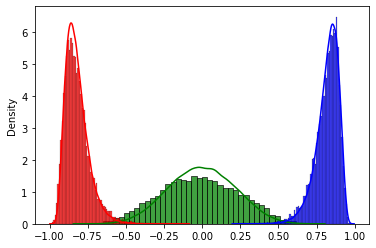

In [85]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(torch.vstack(smcdiff_0_2)[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(torch.vstack(smcdiff_pos_2)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(torch.vstack(smcdiff_neg_2)[:,0], stat = 'density', color = 'red')

In [101]:
smcdiff_samples_0_2 = torch.vstack(smcdiff_0_2)[:,[0]]
smcdiff_samples_pos_2 = torch.vstack(smcdiff_pos_2)[:,[0]]
smcdiff_samples_neg_2 = torch.vstack(smcdiff_neg_2)[:,[0]]

## Example 3

In [86]:
ckpt = torch.load('models/ex_3.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_pos_3 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[0])

smcdiff_samples_neg_3 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[0])

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [88]:
smcdiff_pos_3 = [smcdiff_samples_pos_3]
smcdiff_neg_3 = [smcdiff_samples_neg_3]

In [89]:
for i in range(1,10):
    
    new_sample_pos = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_pos[i])

    new_sample_neg = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 1000, diffused_y = diffused_neg[i])

    smcdiff_pos_3.append(new_sample_pos)
    smcdiff_neg_3.append(new_sample_neg)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

330 resampling, departure=500.38


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

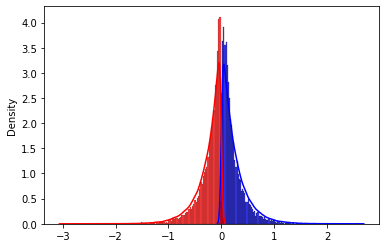

In [90]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(torch.vstack(smcdiff_pos_3)[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(torch.vstack(smcdiff_neg_3)[:,0], stat = 'density', color = 'red')

In [100]:
smcdiff_samples_pos_3 = torch.vstack(smcdiff_pos_3)[:,[0]]
smcdiff_samples_neg_3 = torch.vstack(smcdiff_neg_3)[:,[0]]

In [115]:
torch.save(smcdiff_samples_0, 'data/smcdiff_0_1.pt')
torch.save(smcdiff_samples_pos, 'data/smcdiff_pos_1.pt')
torch.save(smcdiff_samples_neg, 'data/smcdiff_neg_1.pt')

torch.save(smcdiff_samples_0_2, 'data/smcdiff_0_2.pt')
torch.save(smcdiff_samples_pos_2, 'data/smcdiff_pos_2.pt')
torch.save(smcdiff_samples_neg_2, 'data/smcdiff_neg_2.pt')

torch.save(smcdiff_samples_pos_3, 'data/smcdiff_pos_3.pt')
torch.save(smcdiff_samples_neg_3, 'data/smcdiff_neg_3.pt')

<hr style="border:4px solid black">

<a id='comparison'></a>
# Comparison

In [97]:
cde_samples_0 = torch.load('data/cde_0_1.pt')
cde_samples_pos = torch.load('data/cde_pos_1.pt')
cde_samples_neg = torch.load('data/cde_neg_1.pt')
cde_samples_0_2 = torch.load('data/cde_0_2.pt')
cde_samples_pos_2 = torch.load('data/cde_pos_2.pt')
cde_samples_neg_2 = torch.load('data/cde_neg_2.pt')
cde_samples_pos_3 = torch.load('data/cde_pos_3.pt')
cde_samples_neg_3 = torch.load('data/cde_neg_3.pt')

In [41]:
cdiffe_samples_0 = torch.load('data/cdiffe_0_1.pt')[:,[0]]
cdiffe_samples_pos = torch.load('data/cdiffe_pos_1.pt')[:,[0]]
cdiffe_samples_neg = torch.load('data/cdiffe_neg_1.pt')[:,[0]]
cdiffe_samples_0_2 = torch.load('data/cdiffe_0_2.pt')[:,[0]]
cdiffe_samples_pos_2 = torch.load('data/cdiffe_pos_2.pt')[:,[0]]
cdiffe_samples_neg_2 = torch.load('data/cdiffe_neg_2.pt')[:,[0]]
cdiffe_samples_pos_3 = torch.load('data/cdiffe_pos_3.pt')[:,[0]]
cdiffe_samples_neg_3 = torch.load('data/cdiffe_neg_3.pt')[:,[0]]

In [42]:
smcdiff_samples_0 = torch.load('data/smcdiff_0_1.pt')[:,[0]]
smcdiff_samples_pos = torch.load('data/smcdiff_pos_1.pt')[:,[0]]
smcdiff_samples_neg = torch.load('data/smcdiff_neg_1.pt')[:,[0]]
smcdiff_samples_0_2 = torch.load('data/smcdiff_0_2.pt')[:,[0]]
smcdiff_samples_pos_2 = torch.load('data/smcdiff_pos_2.pt')[:,[0]]
smcdiff_samples_neg_2 = torch.load('data/smcdiff_neg_2.pt')[:,[0]]
smcdiff_samples_pos_3 = torch.load('data/smcdiff_pos_3.pt')[:,[0]]
smcdiff_samples_neg_3 = torch.load('data/smcdiff_neg_3.pt')[:,[0]]

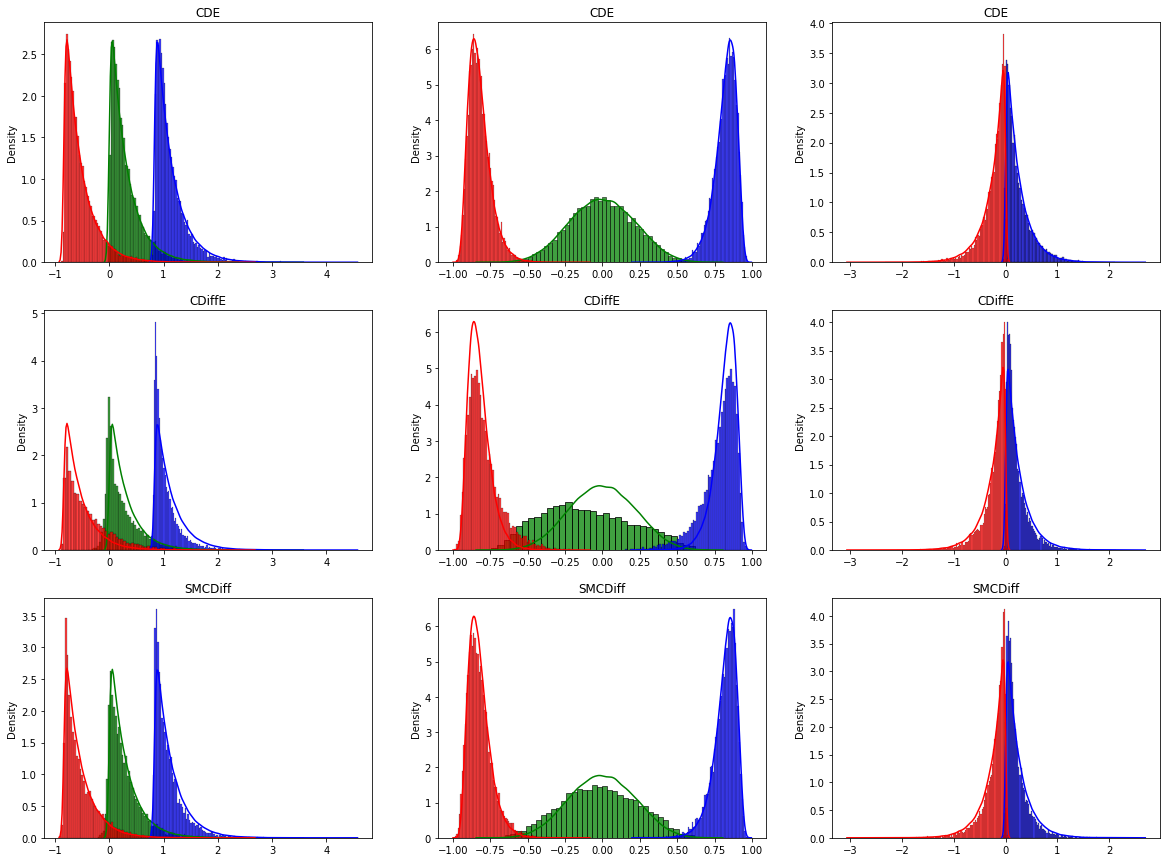

In [106]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))

def plot_row(s1,s2,s3,s4,s5,s6,s7,s8,row,title):
    sns.kdeplot(actual_samples_0, color = 'green', ax = axs[row,0])
    sns.histplot(s1[:,0], stat = 'density', color = 'green', ax = axs[row,0])
    sns.kdeplot(actual_samples_pos, color = 'blue', ax = axs[row,0])
    sns.histplot(s2[:,0], stat = 'density', color = 'blue', ax = axs[row,0])
    sns.kdeplot(actual_samples_neg, color = 'red', ax = axs[row,0])
    sns.histplot(s3[:,0], stat = 'density', color = 'red', ax = axs[row,0])

    sns.kdeplot(actual_samples_0_2, color = 'green', ax = axs[row,1])
    sns.histplot(s4[:,0], stat = 'density', color = 'green', ax = axs[row,1])
    sns.kdeplot(actual_samples_pos_2, color = 'blue', ax = axs[row,1])
    sns.histplot(s5[:,0], stat = 'density', color = 'blue', ax = axs[row,1])
    sns.kdeplot(actual_samples_neg_2, color = 'red', ax = axs[row,1])
    sns.histplot(s6[:,0], stat = 'density', color = 'red', ax = axs[row,1])

    sns.kdeplot(actual_samples_pos_3, color = 'blue', ax = axs[row,2])
    sns.histplot(s7[:,0], stat = 'density', color = 'blue', ax = axs[row,2])
    sns.kdeplot(actual_samples_neg_3, color = 'red', ax = axs[row,2])
    sns.histplot(s8[:,0], stat = 'density', color = 'red', ax = axs[row,2])

    axs[row,0].set_title(title)
    axs[row,1].set_title(title)
    axs[row,2].set_title(title)
    
plot_row(cde_samples_0, cde_samples_pos, cde_samples_neg, 
         cde_samples_0_2, cde_samples_pos_2, cde_samples_neg_2,
         cde_samples_pos_3, cde_samples_neg_3, 0, 'CDE')

plot_row(cdiffe_samples_0, cdiffe_samples_pos, cdiffe_samples_neg, 
         cdiffe_samples_0_2, cdiffe_samples_pos_2, cdiffe_samples_neg_2,
         cdiffe_samples_pos_3, cdiffe_samples_neg_3, 1, 'CDiffE')

plot_row(smcdiff_samples_0, smcdiff_samples_pos, smcdiff_samples_neg, 
         smcdiff_samples_0_2, smcdiff_samples_pos_2, smcdiff_samples_neg_2,
         smcdiff_samples_pos_3, smcdiff_samples_neg_3, 2, 'SMCDiff')

In [107]:
print(np.mean(actual_samples_0))
print(f'CDE: {torch.mean(cde_samples_0)}')
print(f'Replacement: {torch.mean(cdiffe_samples_0)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_0)}')

0.30062557546519525
CDE: 0.30665385723114014
Replacement: 0.24525146186351776
SMCDiff: 0.2812317907810211


In [108]:
print(np.mean(actual_samples_pos))
print(f'CDE: {torch.mean(cde_samples_pos)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos)}')

1.1333589540615339
CDE: 1.1231945753097534
Replacement: 1.0317052602767944
SMCDiff: 1.0813982486724854


In [109]:
print(np.mean(actual_samples_neg))
print(f'CDE: {torch.mean(cde_samples_neg)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg)}')

-0.5349751620002302
CDE: -0.5241797566413879
Replacement: -0.379474401473999
SMCDiff: -0.5254701375961304


In [110]:
print(np.mean(actual_samples_0_2))
print(f'CDE: {torch.mean(cde_samples_0_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_0_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_0_2)}')

-0.00022668195836594805
CDE: -0.0031802195589989424
Replacement: -0.1059098020195961
SMCDiff: -0.020346157252788544


In [111]:
print(np.mean(actual_samples_pos_2))
print(f'CDE: {torch.mean(cde_samples_pos_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos_2)}')

0.8209953878441442
CDE: 0.8198021650314331
Replacement: 0.7789686322212219
SMCDiff: 0.815613865852356


In [112]:
print(np.mean(actual_samples_neg_2))
print(f'CDE: {torch.mean(cde_samples_neg_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg_2)}')

-0.8211355550782375
CDE: -0.8171448111534119
Replacement: -0.7913666367530823
SMCDiff: -0.8186662197113037


In [113]:
print(np.mean(actual_samples_pos_3))
print(f'CDE: {torch.mean(cde_samples_pos_3)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos_3)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos_3)}')

0.2511367185528395
CDE: 0.2496189922094345
Replacement: 0.21512021124362946
SMCDiff: 0.21776743233203888


In [114]:
print(np.mean(actual_samples_neg_3))
print(f'CDE: {torch.mean(cde_samples_neg_3)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg_3)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg_3)}')

-0.2510416565812495
CDE: -0.23583891987800598
Replacement: -0.2191780060529709
SMCDiff: -0.21943901479244232


In [ ]:
smcdiff_means = [torch.mean(smcdiff[i], axis=0) for i in range(10)]